#ANOVA = Analise of Variance

Variância: medida de dispersão que indica o tanto que os valores se distanciaram da média. 

Usada para Y numérico e X categórico com mais de dois niveis

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd



Queremos entender o impacto dos anuncios da nossa empresa em radio. Para isso criamos 4 testes A B para encontramos qual melhor programação de anuncios para trazer novos clientes para empresa. 


1.   A - Seram feitos 2 anuncios por dia( 7 dias da semana) durante o mês
2.   B - Serão feitos 2 anuncios a cada 2 dias durante um mês
3.   C - Serão Feitos 2 anuncios por Semana durante um mês
2.   D - Não serão feitos nenhum anuncio durante o mês







In [76]:
resultados = {'Radio':['Radio 1','Radio 2','Radio 3','Radio 4','Radio 5'],'Diaria':[110,80,50,80,80],'Alternada':[85,53,27,55,50],'Semanal':[52,73,35,39,74],'Controle':[40,42,21,10,12]}
dft = pd.DataFrame(resultados)

nls = dft.drop(['Radio'],axis=1)
dft.drop(['Radio'],axis=1,inplace=True)
dft.head()

,Diaria,Alternada,Semanal,Controle
0,110,85,52,40
1,80,53,73,42
2,50,27,35,21
3,80,55,39,10
4,80,50,74,12


In [0]:
fvalue, pvalue = stats.f_oneway(dft['Diaria'], dft['Alternada'], dft['Semanal'], dft['Controle'])


In [78]:
print(fvalue, pvalue)

6.992412186627924 0.0032162461627488897


Como o pvalue é menor que 0.05 é possivel concluir que existe sim diferença entre o numero de anuncios e o numero de clientes atendidos.

In [0]:
m_comp = pairwise_tukeyhsd(endog=dft['Diaria'], groups=dft['Alternada'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Diaria'], groups=dft['Semanal'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Diaria'], groups=dft['Controle'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Alternada'], groups=dft['Diaria'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Alternada'], groups=dft['Semanal'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Alternada'], groups=dft['Controle'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Semanal'], groups=dft['Diaria'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Semanal'], groups=dft['Semanal'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Semanal'], groups=dft['Controle'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Controle'], groups=dft['Diaria'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Controle'], groups=dft['Semanal'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=dft['Controle'], groups=dft['Controle'], alpha=0.05)


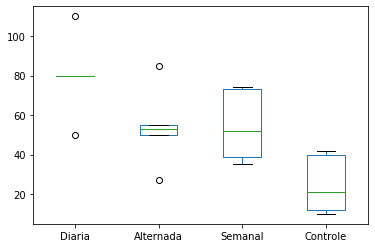

In [0]:
dft.boxplot(['Diaria','Alternada','Semanal','Controle'],grid=False)

Com isso é possivel concluir - Apenas para esse caso, onde os dados foram gerados de forma aleatoria- que nesse caso em especifico não houve diferença significativa entre Diaria, Alternada e Semanal e apenas com Controle